<div class="alert alert-block alert-info">  
<h1><center><strong>Face Mask Detection Implementations</strong></center></h1>
        
</div>

<center><img src="https://image.freepik.com/free-vector/coronavirus-pandemic-prevention-medical-mask-icon-coronavirus-protection_194782-86.jpg"></center>

<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [1]:
import os
import cv2
import random
import skimage
import numpy as np
import seaborn as sns
from tqdm import tqdm
from numpy import expand_dims
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import confusion_matrix, roc_curve
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout



import warnings
warnings.filterwarnings("ignore") 

<h4>How we can install the libraries in python?</h4>

<h4>To install the python library is very easy</h4>
- pip install name_of_library 
<h5> Like if you wanted to install wordcloud? </h5>
- pip install tensorflow

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data 📁 📂</strong></center></h2>
        
</div>

In [2]:
with_maskImage = './Dataset/with_mask'
without_maskImage = './Dataset/without_mask'
mask_files = os.listdir(with_maskImage)
without_mask_files = os.listdir(without_maskImage)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis 🔎</strong></center></h2>
        
</div>

In [3]:
image_categories = []
image_samples = []
for i in os.listdir("./Dataset/"):
    image_categories.append(i)
    image_samples.append(len(os.listdir("./Dataset/"+ i)))
print("Count of dataset images is :", sum(image_samples))

Count of dataset images is : 7553


### Distribution of Classes with counts

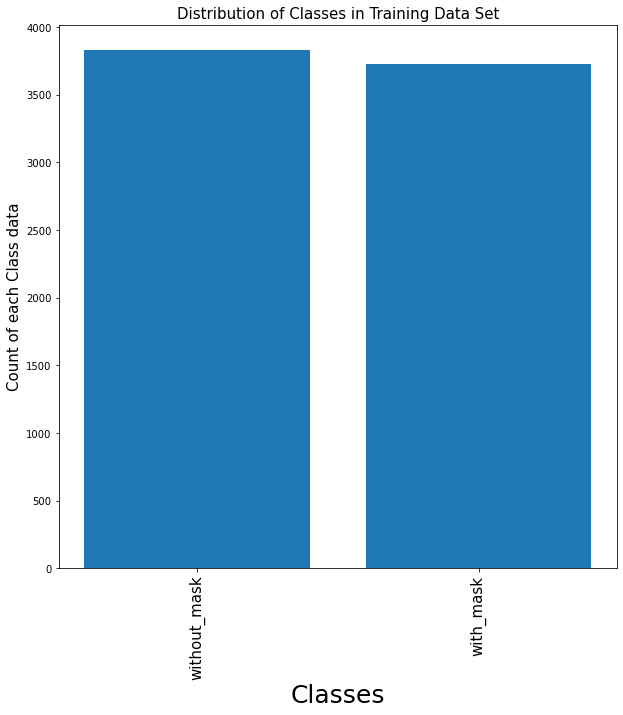

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
index = np.arange(len(image_categories))
plt.bar(index, image_samples)
plt.xlabel('Classes', fontsize=25)
plt.ylabel('Count of each Class data', fontsize=15)
plt.xticks(index, image_categories, fontsize=15, rotation=90)
plt.title('Distribution of Classes in Training Data Set', fontsize=15)
plt.show()

### Visualizing the images without mask

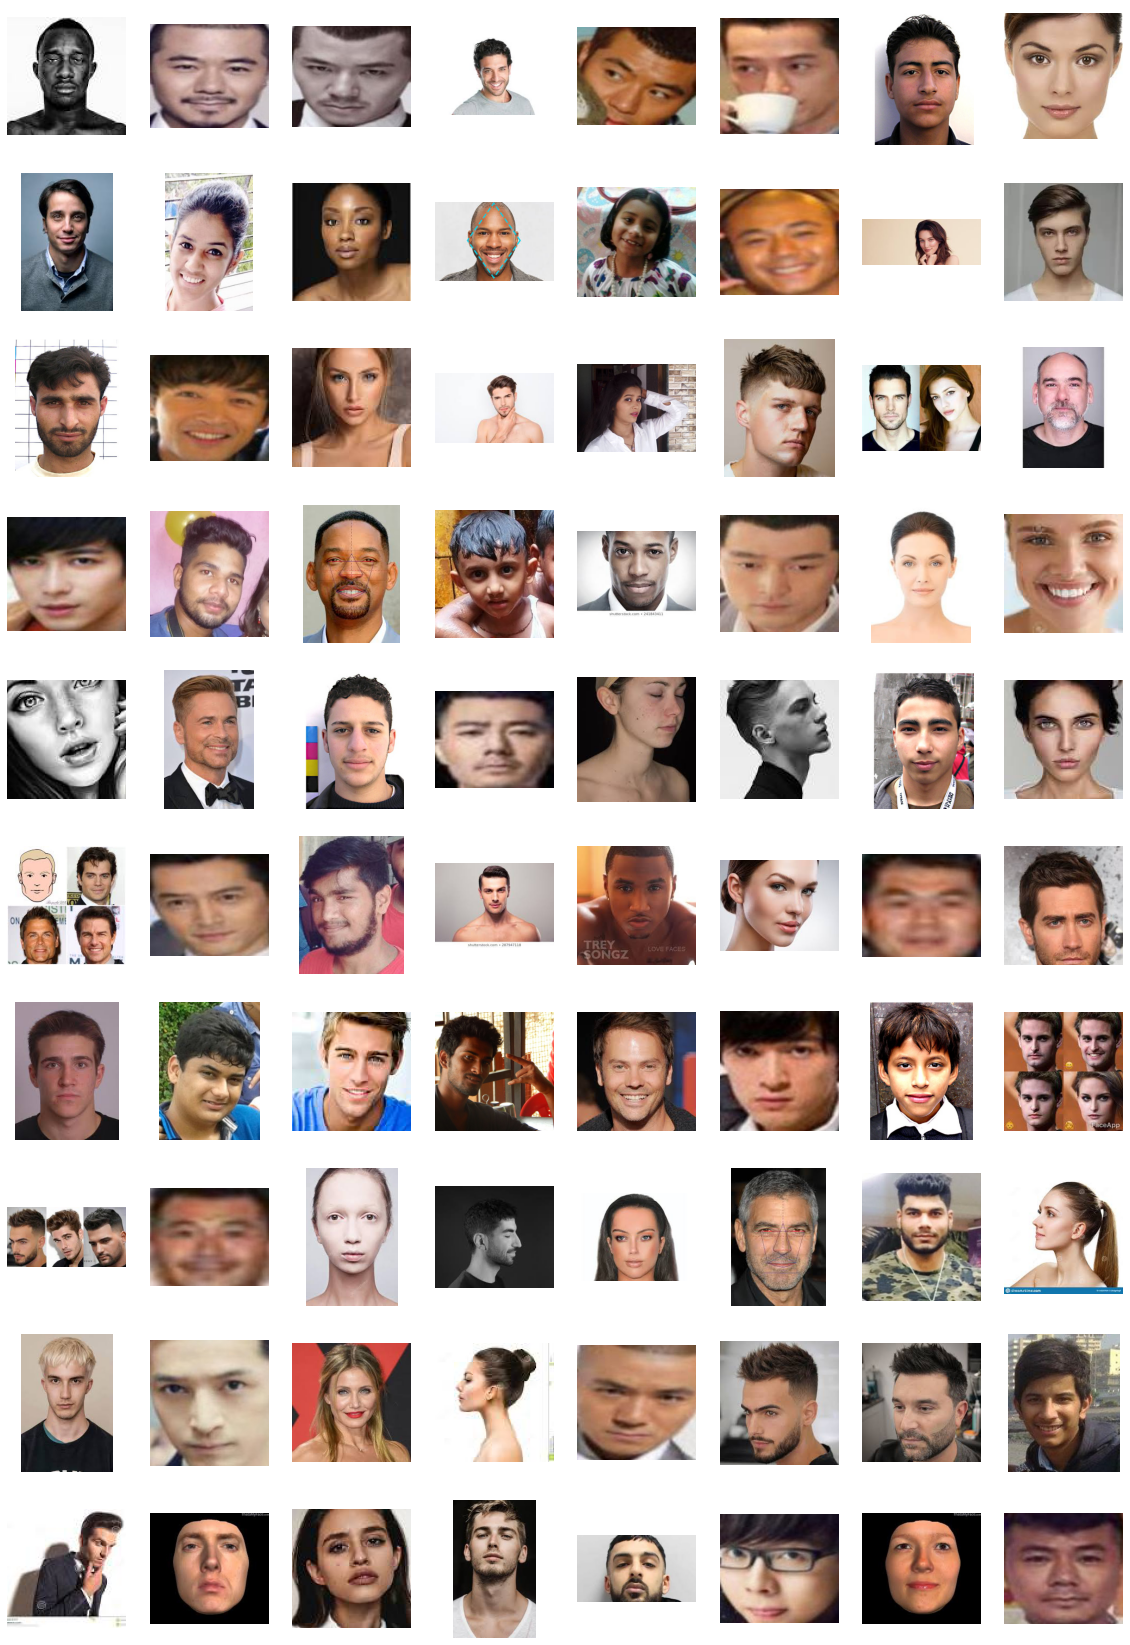

In [8]:
rows=10 #rows in subplots
cols=8 #columns in subplots
fig,ax = plt.subplots(rows,cols,figsize=(20,30))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(without_maskImage,without_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

### Visualizing the images with mask

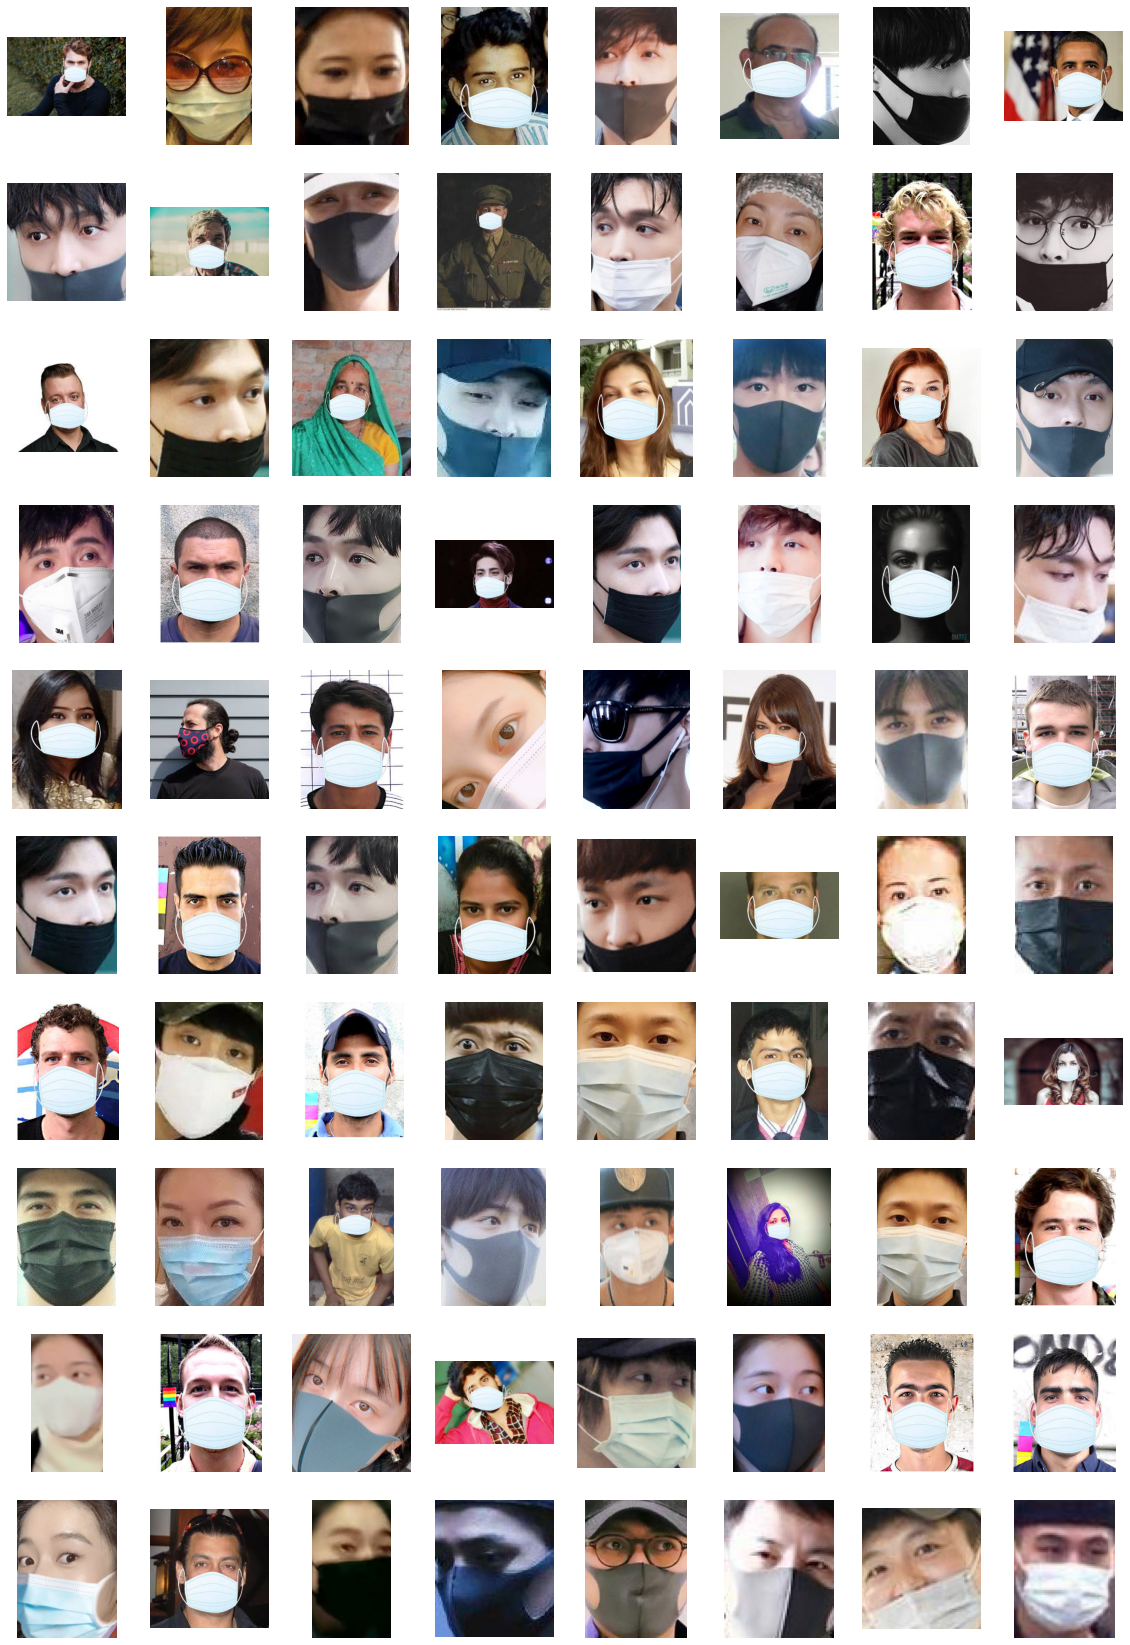

In [9]:
rows=10 #rows in subplots
cols=8 #columns in subplots
fig,ax = plt.subplots(rows,cols,figsize=(20,30))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(with_maskImage,mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

<div class="alert alert-block alert-danger">  
<h1><center><strong>Features Extraction and Data Preprocessing</strong></center></h1>
</div>

In [11]:
train_dir = 'Dataset/' 
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in   ['without_mask']:
                label = 0
            elif folderName in ['with_mask']:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                
                if img_file.size  > 500:
                    if img_file is not None:
                        img_file = skimage.transform.resize(img_file, (224, 224, 3))
                        img_arr = np.asarray(img_file)
                        X.append(img_arr)
                        y.append(label)
                else:
                    print('Not pass')
    X = np.asarray(X)  
    y = np.asarray(y)
    return X,y
X, y= get_data(train_dir)

 15%|████████████▏                                                                  | 592/3828 [00:18<01:10, 45.76it/s]

Not pass


  2%|█▉                                                                              | 90/3725 [00:02<01:17, 47.14it/s]

Not pass
Not pass
Not pass
Not pass
Not pass


  3%|██▎                                                                            | 109/3725 [00:03<01:08, 52.66it/s]

Not pass
Not pass
Not pass
Not pass
Not pass


  3%|██▌                                                                            | 121/3725 [00:03<01:12, 49.47it/s]

Not pass
Not pass
Not pass


  4%|██▊                                                                            | 135/3725 [00:03<01:11, 50.54it/s]

Not pass
Not pass
Not pass


  4%|███▎                                                                           | 154/3725 [00:04<01:12, 49.45it/s]

Not pass
Not pass
Not pass


  5%|███▌                                                                           | 168/3725 [00:04<01:05, 54.08it/s]

Not pass
Not pass


  5%|███▉                                                                           | 183/3725 [00:04<00:59, 59.82it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  5%|████▎                                                                          | 201/3725 [00:05<01:30, 38.84it/s]

Not pass
Not pass


  6%|████▋                                                                          | 221/3725 [00:05<01:13, 47.99it/s]

Not pass
Not pass
Not pass
Not pass


  6%|████▉                                                                          | 233/3725 [00:05<01:07, 51.57it/s]

Not pass
Not pass
Not pass
Not pass


  7%|█████▍                                                                         | 255/3725 [00:06<00:56, 61.65it/s]

Not pass
Not pass
Not pass


  7%|█████▋                                                                         | 271/3725 [00:06<00:53, 64.01it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  7%|█████▉                                                                         | 278/3725 [00:06<01:02, 55.54it/s]

Not pass
Not pass


  8%|██████▎                                                                        | 295/3725 [00:06<01:15, 45.69it/s]

Not pass


  8%|██████▌                                                                        | 311/3725 [00:07<01:17, 44.12it/s]

Not pass
Not pass
Not pass


  9%|███████▏                                                                       | 339/3725 [00:08<01:50, 30.69it/s]

Not pass
Not pass


 10%|███████▉                                                                       | 376/3725 [00:09<01:17, 43.25it/s]

Not pass
Not pass


 10%|████████                                                                       | 381/3725 [00:09<01:22, 40.40it/s]

Not pass
Not pass


 11%|████████▋                                                                      | 408/3725 [00:10<01:32, 35.97it/s]

Not pass


 12%|█████████▍                                                                     | 447/3725 [00:11<01:23, 39.08it/s]

Not pass


 13%|█████████▉                                                                     | 466/3725 [00:11<01:21, 40.14it/s]

Not pass


 15%|███████████▉                                                                   | 561/3725 [00:15<01:29, 35.26it/s]

Not pass


 15%|████████████▏                                                                  | 574/3725 [00:15<01:29, 35.07it/s]

Not pass


 16%|████████████▊                                                                  | 606/3725 [00:16<01:47, 28.90it/s]

Not pass


 17%|█████████████                                                                  | 615/3725 [00:17<01:35, 32.72it/s]

Not pass


 17%|█████████████▎                                                                 | 628/3725 [00:17<01:44, 29.58it/s]

Not pass


 17%|█████████████▊                                                                 | 649/3725 [00:18<01:50, 27.80it/s]

Not pass


 20%|███████████████▋                                                               | 739/3725 [00:22<02:06, 23.52it/s]

Not pass


 21%|████████████████▎                                                              | 769/3725 [00:23<01:29, 33.03it/s]

Not pass


 21%|████████████████▉                                                              | 797/3725 [00:24<01:11, 41.15it/s]

Not pass


 22%|█████████████████▏                                                             | 813/3725 [00:24<01:05, 44.49it/s]

Not pass
Not pass


 22%|█████████████████▍                                                             | 824/3725 [00:24<01:06, 43.95it/s]

Not pass
Not pass


 23%|█████████████████▊                                                             | 840/3725 [00:25<01:03, 45.45it/s]

Not pass
Not pass


 23%|██████████████████                                                             | 851/3725 [00:25<01:03, 45.03it/s]

Not pass


 24%|██████████████████▊                                                            | 889/3725 [00:26<01:11, 39.54it/s]

Not pass
Not pass


 25%|███████████████████▍                                                           | 918/3725 [00:27<01:25, 32.88it/s]

Not pass


 26%|████████████████████▎                                                          | 959/3725 [00:30<02:24, 19.13it/s]

Not pass


 26%|████████████████████▊                                                          | 983/3725 [00:31<03:06, 14.71it/s]

Not pass


 31%|████████████████████████▏                                                     | 1154/3725 [00:39<01:04, 39.76it/s]

Not pass


 32%|█████████████████████████                                                     | 1199/3725 [00:40<01:00, 41.57it/s]

Not pass


 34%|██████████████████████████▎                                                   | 1257/3725 [00:41<00:46, 53.32it/s]

Not pass


 44%|██████████████████████████████████▏                                           | 1633/3725 [00:52<00:40, 51.44it/s]

Not pass


 44%|██████████████████████████████████▌                                           | 1652/3725 [00:52<00:37, 54.86it/s]

Not pass


 46%|███████████████████████████████████▌                                          | 1699/3725 [00:53<00:40, 50.47it/s]

Not pass


 48%|█████████████████████████████████████▍                                        | 1786/3725 [00:55<00:38, 49.74it/s]

Not pass


 51%|███████████████████████████████████████▋                                      | 1898/3725 [00:58<00:34, 52.68it/s]

Not pass
Not pass


 52%|████████████████████████████████████████▋                                     | 1941/3725 [00:59<00:32, 55.74it/s]

Not pass


 52%|████████████████████████████████████████▉                                     | 1953/3725 [00:59<00:32, 54.83it/s]

Not pass


 56%|███████████████████████████████████████████▉                                  | 2098/3725 [01:02<00:37, 43.95it/s]

Not pass


 62%|████████████████████████████████████████████████▎                             | 2306/3725 [01:08<00:37, 38.10it/s]

Not pass


 63%|████████████████████████████████████████████████▉                             | 2338/3725 [01:08<00:40, 34.47it/s]

Not pass


 72%|████████████████████████████████████████████████████████▎                     | 2692/3725 [03:37<02:37,  6.54it/s]

Not pass


 73%|█████████████████████████████████████████████████████████▎                    | 2735/3725 [03:42<02:34,  6.41it/s]

Not pass


 77%|███████████████████████████████████████████████████████████▊                  | 2856/3725 [03:55<00:20, 42.86it/s]

Not pass


 82%|███████████████████████████████████████████████████████████████▌              | 3037/3725 [03:59<00:13, 50.23it/s]

Not pass


 82%|████████████████████████████████████████████████████████████████              | 3061/3725 [03:59<00:12, 52.24it/s]

Not pass
Not pass
Not pass
Not pass


 83%|████████████████████████████████████████████████████████████████▍             | 3075/3725 [03:59<00:11, 58.19it/s]

Not pass


 83%|████████████████████████████████████████████████████████████████▊             | 3094/3725 [04:00<00:11, 56.98it/s]

Not pass
Not pass
Not pass


 84%|█████████████████████████████████████████████████████████████████▏            | 3112/3725 [04:00<00:11, 52.96it/s]

Not pass
Not pass


 84%|█████████████████████████████████████████████████████████████████▊            | 3141/3725 [04:01<00:11, 51.79it/s]

Not pass
Not pass


 85%|██████████████████████████████████████████████████████████████████            | 3153/3725 [04:01<00:11, 50.59it/s]

Not pass
Not pass


 86%|██████████████████████████████████████████████████████████████████▉           | 3196/3725 [04:02<00:12, 42.97it/s]

Not pass
Not pass


 86%|███████████████████████████████████████████████████████████████████▍          | 3219/3725 [04:02<00:10, 46.59it/s]

Not pass
Not pass


 87%|███████████████████████████████████████████████████████████████████▋          | 3232/3725 [04:03<00:09, 51.99it/s]

Not pass
Not pass


 88%|████████████████████████████████████████████████████████████████████▎         | 3260/3725 [04:03<00:10, 45.47it/s]

Not pass
Not pass


 88%|████████████████████████████████████████████████████████████████████▍         | 3271/3725 [04:04<00:09, 48.75it/s]

Not pass
Not pass


 88%|█████████████████████████████████████████████████████████████████████         | 3296/3725 [04:04<00:08, 47.70it/s]

Not pass


 89%|█████████████████████████████████████████████████████████████████████▎        | 3309/3725 [04:04<00:08, 50.97it/s]

Not pass
Not pass


 89%|█████████████████████████████████████████████████████████████████████▌        | 3325/3725 [04:05<00:08, 46.43it/s]

Not pass
Not pass


 90%|██████████████████████████████████████████████████████████████████████        | 3343/3725 [04:05<00:07, 50.39it/s]

Not pass


 90%|██████████████████████████████████████████████████████████████████████▍       | 3366/3725 [04:06<00:07, 45.22it/s]

Not pass


 91%|██████████████████████████████████████████████████████████████████████▉       | 3390/3725 [04:06<00:06, 50.53it/s]

Not pass
Not pass
Not pass


 91%|███████████████████████████████████████████████████████████████████████▎      | 3405/3725 [04:06<00:05, 60.14it/s]

Not pass
Not pass
Not pass
Not pass
Not pass


 92%|███████████████████████████████████████████████████████████████████████▌      | 3419/3725 [04:07<00:05, 60.80it/s]

Not pass
Not pass


 93%|████████████████████████████████████████████████████████████████████████▏     | 3446/3725 [04:07<00:03, 73.88it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 93%|████████████████████████████████████████████████████████████████████████▍     | 3462/3725 [04:07<00:04, 59.14it/s]

Not pass
Not pass
Not pass
Not pass
Not pass


 96%|██████████████████████████████████████████████████████████████████████████▋   | 3565/3725 [04:10<00:04, 37.86it/s]

Not pass


 97%|███████████████████████████████████████████████████████████████████████████▌  | 3606/3725 [04:11<00:03, 38.78it/s]

Not pass
Not pass


 97%|████████████████████████████████████████████████████████████████████████████  | 3631/3725 [04:12<00:02, 32.39it/s]

Not pass


 98%|████████████████████████████████████████████████████████████████████████████▋ | 3663/3725 [04:12<00:01, 31.18it/s]

Not pass


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3690/3725 [04:13<00:00, 39.91it/s]

Not pass


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3696/3725 [04:13<00:00, 44.31it/s]

Not pass


100%|█████████████████████████████████████████████████████████████████████████████▌| 3707/3725 [04:13<00:00, 45.51it/s]

Not pass
Not pass


100%|█████████████████████████████████████████████████████████████████████████████▊| 3719/3725 [04:14<00:00, 48.72it/s]

Not pass
Not pass
Not pass


100%|██████████████████████████████████████████████████████████████████████████████| 3725/3725 [04:14<00:00, 14.65it/s]


### Shape of the data

In [12]:
#input features 
X.shape

(7385, 224, 224, 3)

In [13]:
#output class
y.shape

(7385,)

### Text labels

In [14]:
Labels = ['With Mask','Without Mask']

In [15]:
Labels

['With Mask', 'Without Mask']

<b> <h3> Label : </h3></b>  Labels are the classes like in this project with mask and without mask. 

<b> <h3> Input features : </h3></b>  Input features are the data features that we extracted from the images and will feed into models for training and testing.

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to model so that model can learn from the data.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true label with predicted label and get the performance of the model.

### Normalizing the dataset

In [17]:
X=X/255

### Split the 70% data as Training and 30% as Testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

<div class="alert alert-block alert-success">  
<h1><center><strong>Data augmentation of training data</strong></center></h1>
</div>

<center><img src="https://miro.medium.com/max/432/1*afUcgATPU4jjcDCkxpsH_A.png"></center>

### Data augmentation function

In [23]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=True, 
    vertical_flip=True)

### Calling Random Image from without mask image

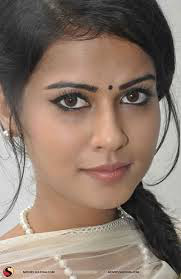

In [24]:
a=random.randint(1,1000)
load_img(os.path.join(without_maskImage,without_mask_files[a]))

### Applying the Data augmentation function to get the augmentated images of above

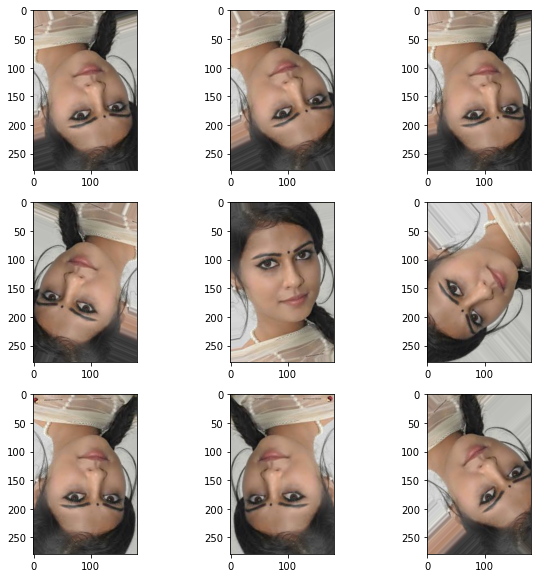

In [25]:
img = load_img(without_maskImage+'/'+without_mask_files[a])  
data = img_to_array(img)
samples = expand_dims(data, 0)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

### Calling Random Image from with mask image

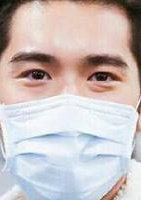

In [26]:
a=random.randint(1,1000)
load_img(os.path.join(with_maskImage,mask_files[a]))

### Applying the Data augmentation function to get the augmentated images of above

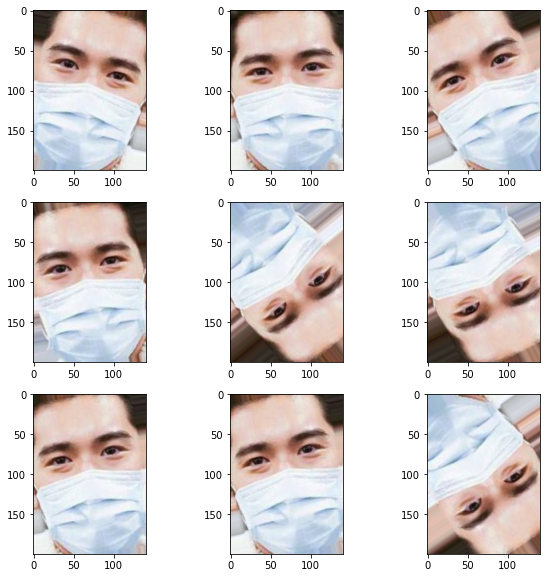

In [27]:
img = load_img(with_maskImage+'/'+mask_files[a])  
data = img_to_array(img)
samples = expand_dims(data, 0)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

<div class="alert alert-block alert-danger">  
<h2><center><strong>Inception V3 Model as Transfer learning</strong></center></h2>
        
</div>

In [11]:
inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)
model = Model(inputs=inception.input, outputs=outputs)
for layer in inception.layers:
    layer.trainable = False
model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)


87916544/87910968 [==============================] - 1s 0us/step


In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

### Training the model with data augmentation

In [13]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=500)

Epoch 1/500
24/23 [==============================] - 12s 514ms/step - loss: 3.3455 - accuracy: 0.6835 - val_loss: 0.9534 - val_accuracy: 0.8404
Epoch 2/500
24/23 [==============================] - 9s 374ms/step - loss: 1.6342 - accuracy: 0.7899 - val_loss: 0.5464 - val_accuracy: 0.8298
Epoch 3/500
24/23 [==============================] - 9s 374ms/step - loss: 1.3282 - accuracy: 0.8205 - val_loss: 0.5387 - val_accuracy: 0.8404
Epoch 4/500
24/23 [==============================] - 9s 372ms/step - loss: 1.0077 - accuracy: 0.8404 - val_loss: 0.6891 - val_accuracy: 0.8511
Epoch 5/500
24/23 [==============================] - 9s 381ms/step - loss: 0.9374 - accuracy: 0.8245 - val_loss: 0.4520 - val_accuracy: 0.8883
Epoch 6/500
24/23 [==============================] - 9s 377ms/step - loss: 0.7643 - accuracy: 0.8564 - val_loss: 0.5271 - val_accuracy: 0.8936
Epoch 7/500
24/23 [==============================] - 9s 369ms/step - loss: 0.8355 - accuracy: 0.8378 - val_loss: 1.2786 - val_accuracy: 0.718

<div class="alert alert-block alert-success">  
<h1><center><strong>Getting Predictions on Test data and Evaluation on different Measures</strong></center></h1>
</div>

In [44]:
y_pred = model.predict(X_test, batch_size=batch_size)

In [45]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

### Plot ROC Curve

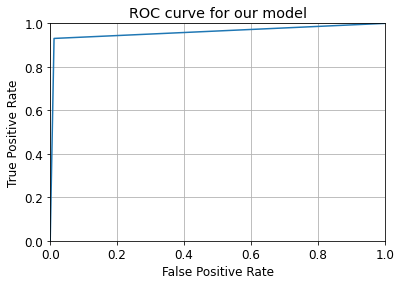

In [30]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Plot Confusion Matrix

Confusion Matrix with Normalized Values


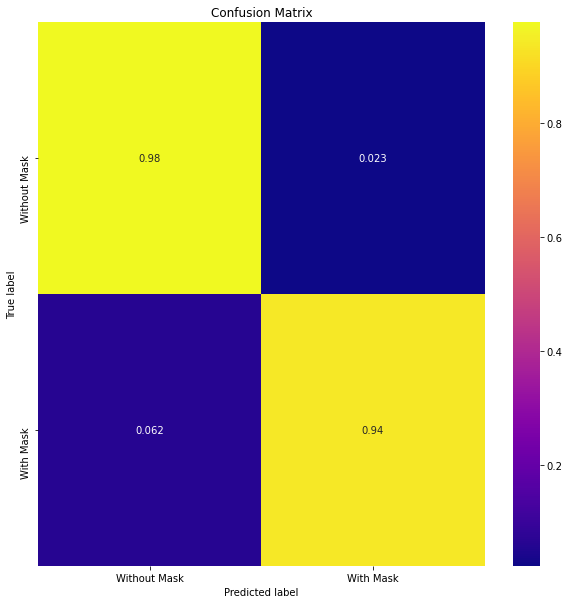

In [46]:
def plot_confusion_matrix(normalize):
  classes = ['Without Mask','With Mask']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### Accuray, Precision, Recall and F1 Measures 

In [32]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.99      0.93      0.96       101

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



### Traning and Testing Accuracy

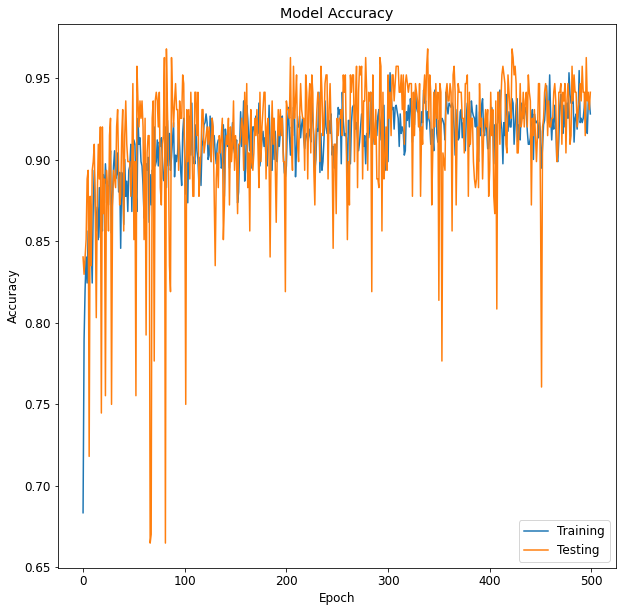

In [23]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.show()


# Traning and Testing Loss

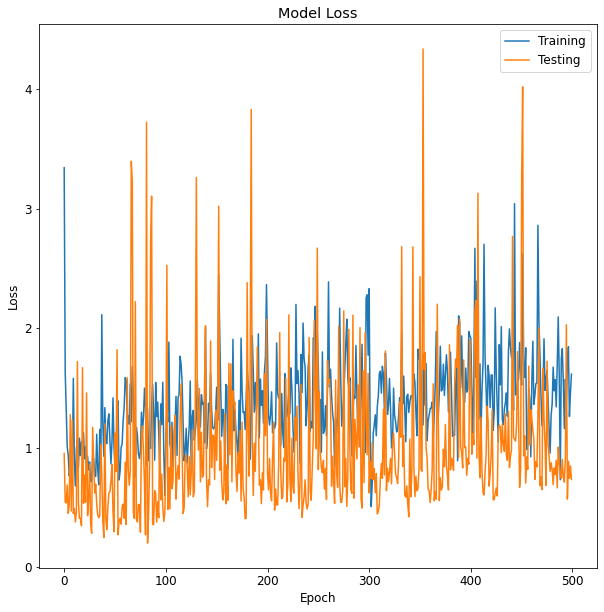

In [24]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()